In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import numpy as np 

In [31]:
df_hex = pd.read_csv("hexathalon.csv") 
df_pen = pd.read_csv("pentathalon.csv")

In [42]:
df_pen

,YEAR,WEEK,RS_SALES,UNIT_SALES,STORE_NO,CITY,STATE,FORMAT,REGION,NEWYEAR,VALENTINES,DUSSEHRA,DIWALI,CHRISTMAS,WEEK_MAX_TEMP1,WEEK_MIN_TEMP,RAIN_MM,SHORTAGE1,POPULATION,date
0,2016,1,975557.59000,16290.000000,21001,PANAJI,GOA,MEGABOX,WEST,1,0,0,0,0,32.00,15.28,0.0,11.30,420114.00,2016-01-04
1,2016,2,607104.57000,15075.000000,21001,PANAJI,GOA,MEGABOX,WEST,0,0,0,0,0,18.00,13.19,10.0,12.10,422214.57,2016-01-11
2,2016,3,587348.56000,14334.000000,21001,PANAJI,GOA,MEGABOX,WEST,0,0,0,0,0,17.00,13.24,6.0,12.50,424315.14,2016-01-18
3,2016,4,568805.59000,14459.000000,21001,PANAJI,GOA,MEGABOX,WEST,0,0,0,0,0,16.00,13.87,4.0,12.80,426415.71,2016-01-25
4,2016,5,596242.03000,14400.000000,21001,PANAJI,GOA,MEGABOX,WEST,0,0,0,0,0,17.65,14.42,0.0,12.20,428516.28,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2016,48,53471.56847,841.176471,21008,OOTY,TAMILNADU,MINIBOX,SOUTH,0,0,0,1,0,20.40,30.66,0.0,0.24,65640.00,2016-11-28
412,2016,49,34053.04047,751.105882,21008,OOTY,TAMILNADU,MINIBOX,SOUTH,0,0,0,0,0,15.50,24.00,21.0,0.42,65760.00,2016-12-05
413,2016,50,41676.95671,817.976471,21008,OOTY,TAMILNADU,MINIBOX,SOUTH,0,0,0,0,0,19.50,25.99,0.0,0.33,65880.00,2016-12-12
414,2016,51,44728.77224,952.094118,21008,OOTY,TAMILNADU,MINIBOX,SOUTH,0,0,0,0,0,22.60,30.21,0.0,0.24,66000.00,2016-12-19


In [32]:
df_hex.shape

(52, 9)

In [38]:
df_pen.shape

(416, 19)

In [86]:
df_pen['date'] = pd.to_datetime(df_pen.WEEK.astype(str)+
                           df_pen.YEAR.astype(str).add('-1') ,format='%V%G-%u')
df_pen.set_index('date', inplace=True)

datetime.date(2020, 1, 1)

In [26]:
df_pen.head(20)
DATE = date.fromisocalendar


AttributeError: type object 'datetime.date' has no attribute 'fromisocalendar'

In [87]:
df_pen.columns

Index(['YEAR', 'WEEK', 'RS_SALES', 'UNIT_SALES', 'STORE_NO', 'CITY', 'STATE',
       'FORMAT', 'REGION', 'NEWYEAR', 'VALENTINES', 'DUSSEHRA', 'DIWALI',
       'CHRISTMAS', 'WEEK_MAX_TEMP1', 'WEEK_MIN_TEMP', 'RAIN_MM', 'SHORTAGE1',
       'POPULATION'],
      dtype='object')

In [88]:
 new_year = df_pen.loc[df_pen['NEWYEAR'] == 1].date

AttributeError: 'DataFrame' object has no attribute 'date'

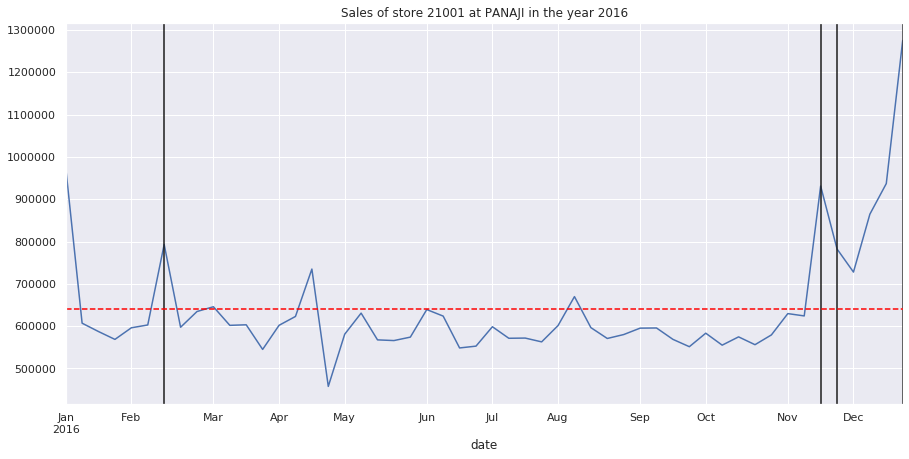

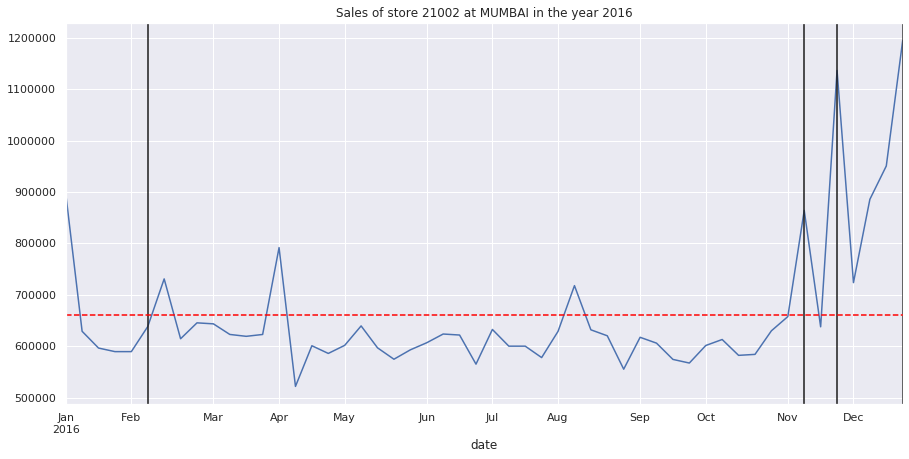

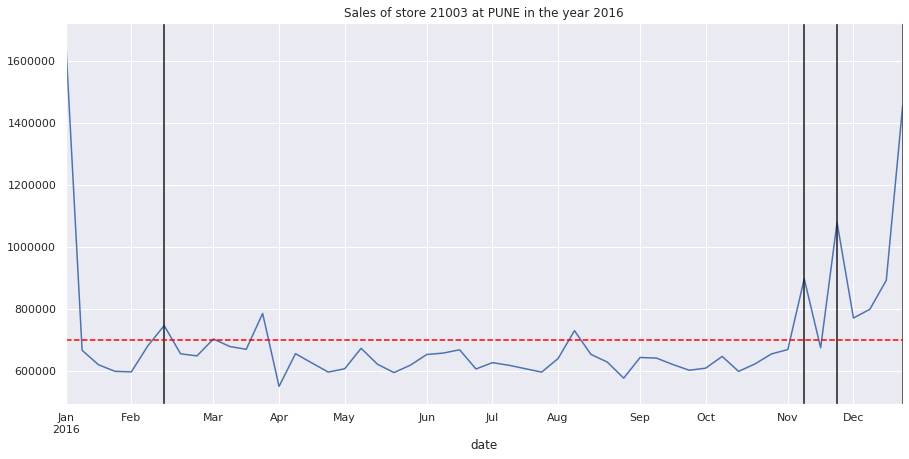

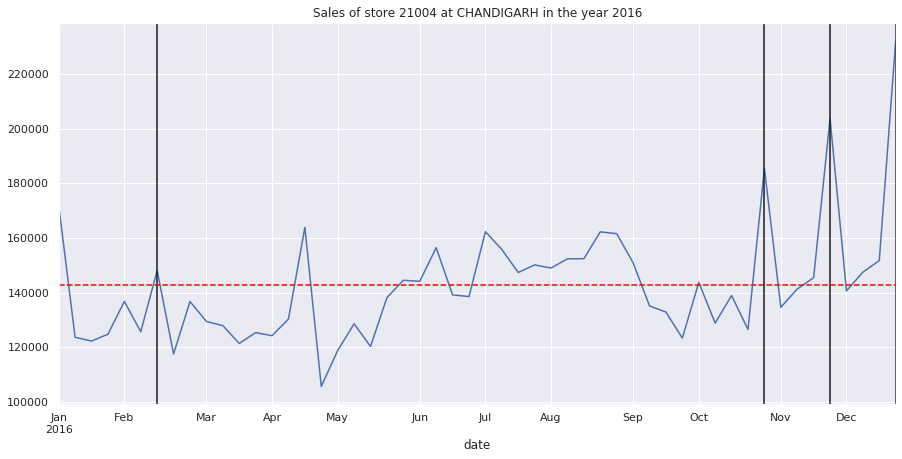

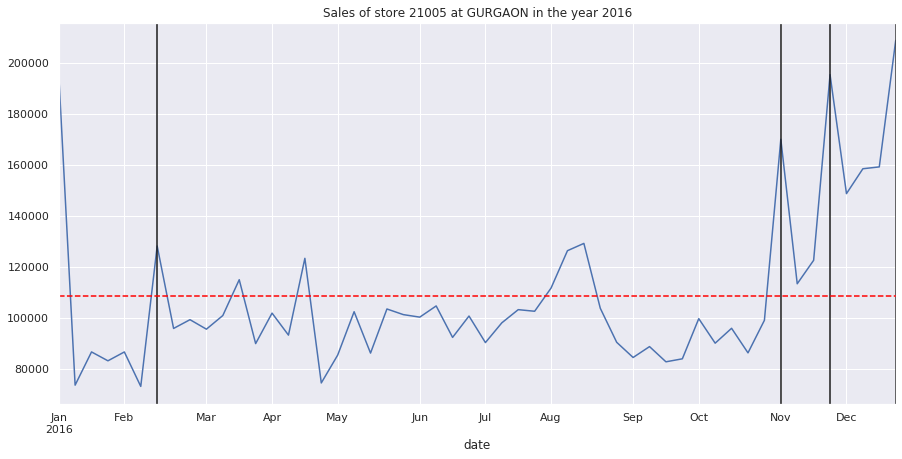

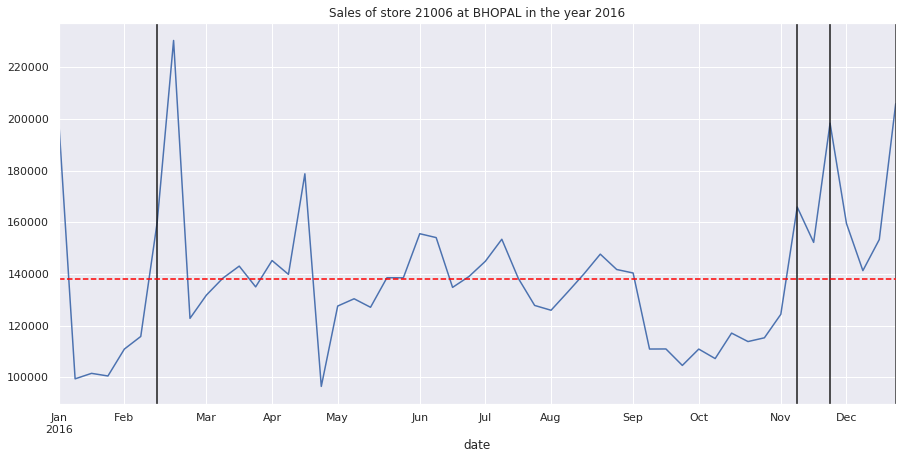

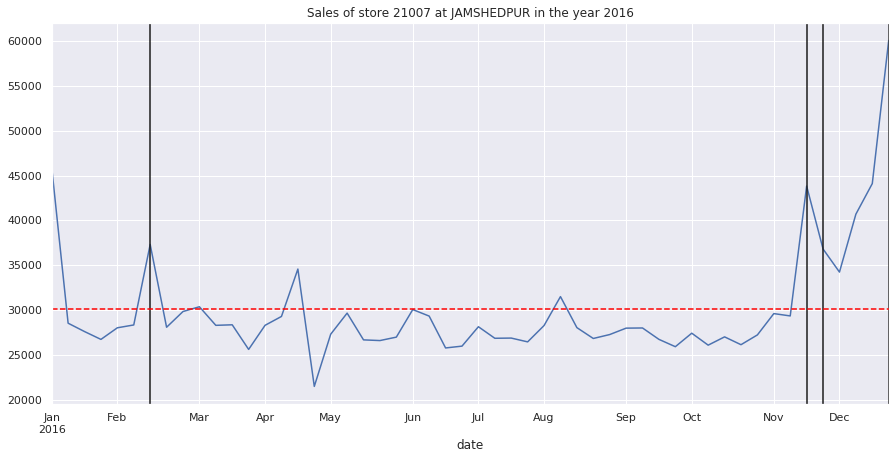

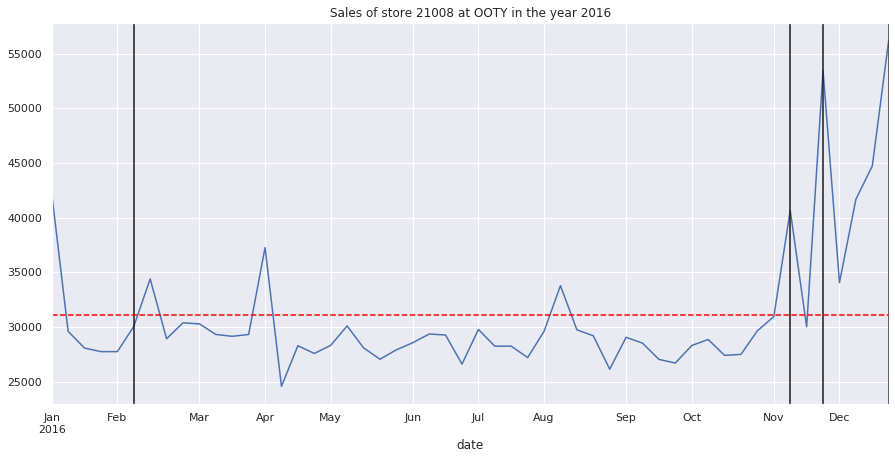

In [93]:
# plot_unique_users 

stores = set(df_pen["STORE_NO"]) 
for store in stores : 
    df_temp = df_pen.loc[df_pen["STORE_NO"] == store]
    
    
    new_year = df_temp.loc[df_temp['NEWYEAR'] == 1].index[0]
    valentines =  df_temp.loc[df_temp['VALENTINES'] == 1].index[0]
    dussehra = df_temp.loc[df_temp['DUSSEHRA'] == 1].index[0]
    diwali = df_temp.loc[df_temp['DIWALI'] == 1].index[0]
    christmas = df_temp.loc[df_temp['CHRISTMAS'] == 1].index[0]
    
    xposition = [new_year, valentines, dussehra, diwali, christmas]

    #print(xposition)
    
    ax = df_temp[[ "RS_SALES"]].plot(figsize=(15,7), legend=False)
    for xc in xposition:
        ax.axvline(x=xc, color='k', linestyle='-')
    
    mean = np.mean(df_temp["RS_SALES"].values)
    ax.axhline(mean, color="red", linestyle="--", label="Mean Sales")
    plt.title(f"Sales of store {store} at {df_temp.head(1).CITY.values[0]} in the year 2016")
    plt.show()

In [60]:
## TAaking subset to plot correlation of SALES with numerical variables

df_rel = df_pen[["RS_SALES", 'WEEK_MAX_TEMP1', 'WEEK_MIN_TEMP', 'RAIN_MM', 'SHORTAGE1',
       'POPULATION']]

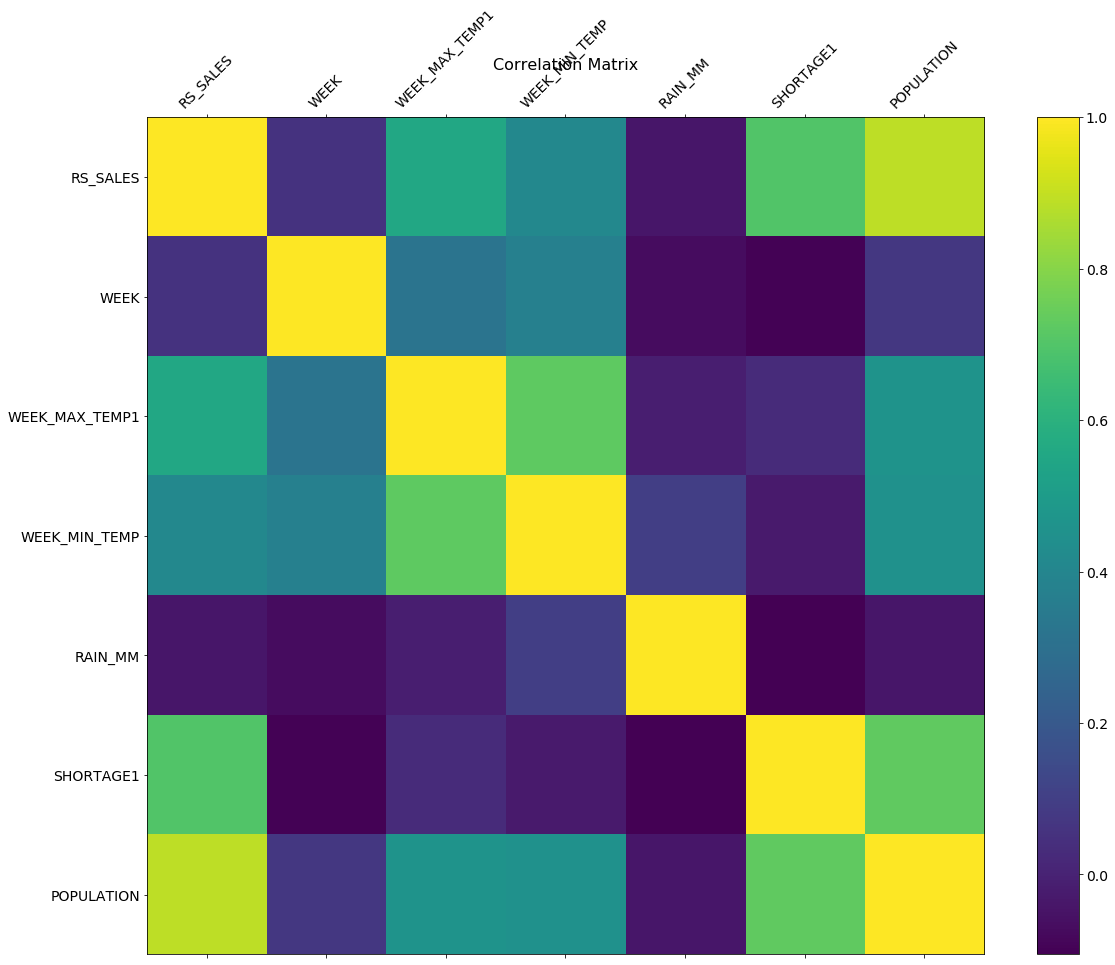

In [61]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df_rel.corr(), fignum=f.number)
plt.xticks(range(df_rel.select_dtypes(['number']).shape[1]), df_rel.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_rel.select_dtypes(['number']).shape[1]), df_rel.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# sales is mostly correlated with population, shortage, and min and max temp

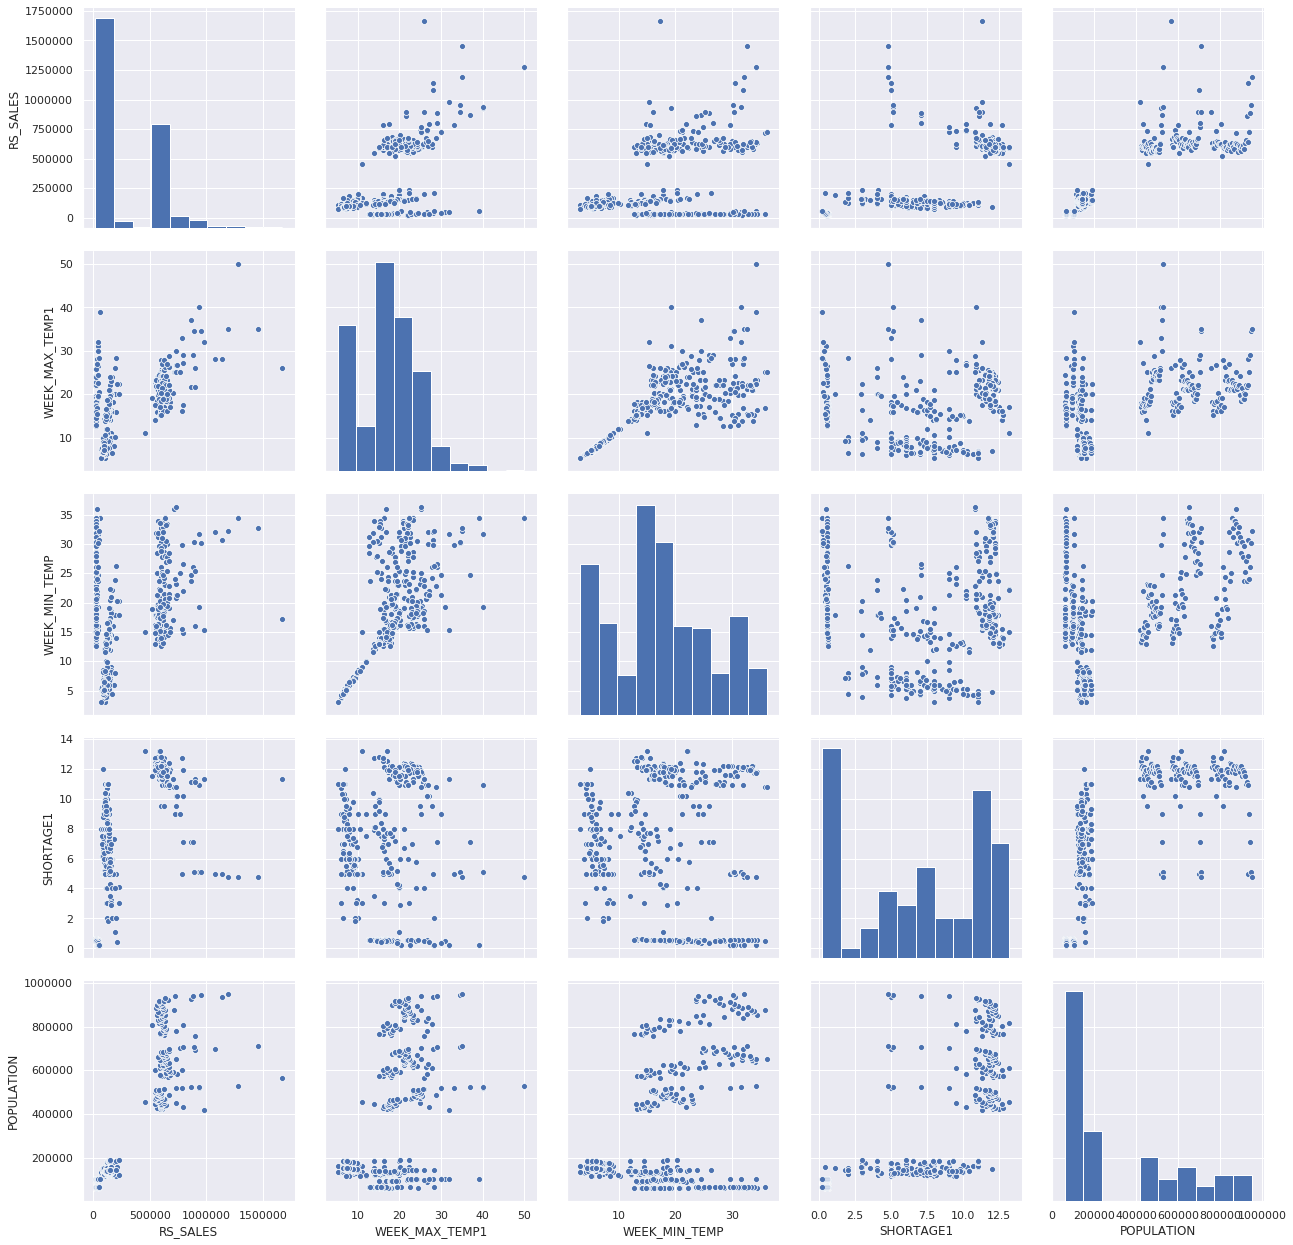

In [64]:
#More correlation plots 


sns.set()
cols = ["RS_SALES", 'WEEK_MAX_TEMP1', 'WEEK_MIN_TEMP', 'SHORTAGE1',
       'POPULATION']
sns.pairplot(df_pen[cols], height = 3.5)
plt.show();
